In [545]:
import numpy as np
import matplotlib.pyplot as plt

In [600]:
n0=1
k=1.381e-23
T0=2930
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [601]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

vmin=1e3
vmax=1*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))
ratio=(vmax/vmin)**(1.0/(n-1))
dv=v[1:]-v[:n-1] #v*(ratio-1)

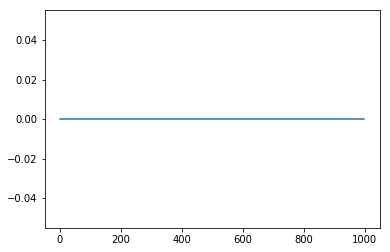

1.00766458129


In [602]:
plt.plot(dv[:n-1]-v[1:]+v[:n-1])
plt.show()
print(ratio)

In [603]:
np.shape(v)

(1000, 1)

In [604]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [605]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return (k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2) # v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [606]:
def alpha(i):
    return a(v[i])/dv[i-1]**2
def beta(i):
    return -(2*a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1])
def gamma(i):
    return a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1]+c(v[i])

In [607]:
B[0,0]=1
B[1,0]=1

A[0,0]=1
A[1,1]=1
for i in range(2,n-1):
    A[i,i-2]=alpha(i)
    A[i,i-1]=beta(i)
    A[i,i]=gamma(i)
A[n-1,n-1]=1    
print(A)    

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.02641802e-09  -6.18758660e-09   3.16116860e-09 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.34273527e-15
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -2.06918132e-15
    1.33066914e-15   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]


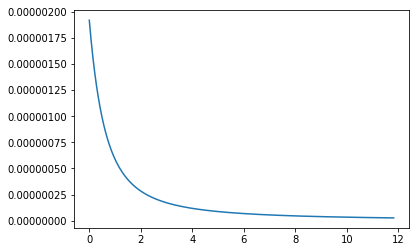

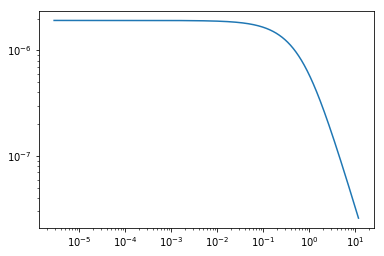

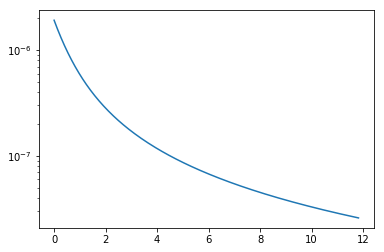

In [608]:
f0=np.matmul(np.linalg.inv(A),B)
f0=f0[:n-1]
v=v[:n-1]

#f0_anyl = np.exp(-v[:,0]**2/k/T0)

#mynorm = np.trapz(f0_anyl, v[:,0])
#f0_anyl /= mynorm
#print(mynorm)

f0=f0/np.sum(f0*dv) #Normalising f0
plt.plot(0.5*m*v**2/q,f0)
plt.plot(0.5*m*v**2/q,f0_anyl)
plt.show()
plt.loglog(0.5*m*v**2/q,f0)
plt.show()
plt.semilogy(0.5*m*v**2/q,f0)
plt.show()

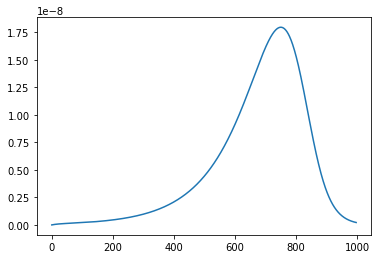

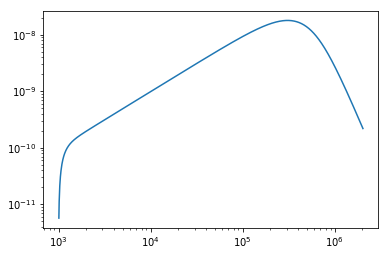

In [609]:
f1=-q*E*(f0[1:]-f0[:n-2])/dv[:n-2]/(m*vm(v[:n-2]))
plt.plot(f1[:n-2])
plt.show()
plt.loglog(v[:n-2],f1[:n-2])
plt.show()

In [610]:
np.shape(f1)

(998, 1)

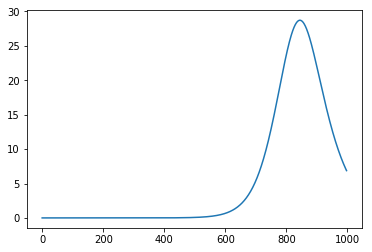

In [611]:
W=np.sum(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.plot(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.show()

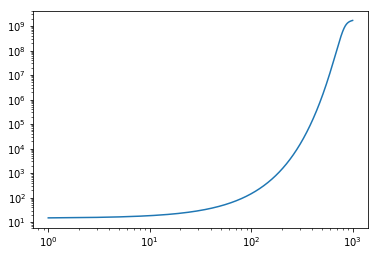

In [612]:
eps=np.sum(0.5*m*v*f0*dv)/2#np.sum(0.5*m*v**2*f0*dv)
plt.loglog(v**2*f0*dv)
plt.show()

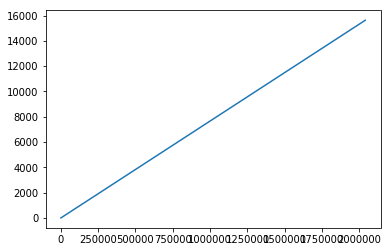

In [613]:
plt.plot(v[:n-1],dv)
plt.show()

In [614]:
np.sum(f1*dv[:n-2])

0.011231095014548617

In [615]:
print(W/1e4,eps/1.6e-19)

0.558695285637 5.66884735763e-07


In [616]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [617]:
print((1-W/W0)*100,(1-eps/eps0)*100)

5.78494340015 99.9999222487


In [618]:
pik=np.arange(1,1000)
plt.plot()

[]

In [619]:
0.5*m0*W0**2/q

0.7289977908364543